# Current population of Germany by Nationality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Population Germany, reference date, nationality.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df.head()

,ReferenceDate,Germans,Foreigners,Total
0,1970-12-31,58263259,2737905,61001164
1,1971-12-31,58314646,3187857,61502503
2,1972-12-31,58255300,3554078,61809378
3,1973-12-31,58110017,3991352,62101369
4,1974-12-31,57940513,4050962,61991475


In [5]:
df.tail()

,ReferenceDate,Germans,Foreigners,Total
46,2016-12-31,73301664,9219989,82521653
47,2017-12-31,73113483,9678868,82792351
48,2018-12-31,72929921,10089292,83019213
49,2019-12-31,72768689,10398022,83166711
50,2020-12-31,72569978,10585053,83155031


In [6]:
df.shape                  

(51, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ReferenceDate  51 non-null     object
 1   Germans        51 non-null     int64 
 2   Foreigners     51 non-null     int64 
 3   Total          51 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [8]:
df['ReferenceDate'] = pd.to_datetime(df['ReferenceDate'])                      # convert ReferenceDate series to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ReferenceDate  51 non-null     datetime64[ns]
 1   Germans        51 non-null     int64         
 2   Foreigners     51 non-null     int64         
 3   Total          51 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 KB


In [9]:
df['Year'] = pd.DatetimeIndex(df['ReferenceDate']).year                        # extract year
df['Month'] = pd.DatetimeIndex(df['ReferenceDate']).month                      # extract month
df['Day'] = pd.DatetimeIndex(df['ReferenceDate']).day                          # extract day

df.head(10)

,ReferenceDate,Germans,Foreigners,Total,Year,Month,Day
0,1970-12-31,58263259,2737905,61001164,1970,12,31
1,1971-12-31,58314646,3187857,61502503,1971,12,31
2,1972-12-31,58255300,3554078,61809378,1972,12,31
3,1973-12-31,58110017,3991352,62101369,1973,12,31
4,1974-12-31,57940513,4050962,61991475,1974,12,31
5,1975-12-31,57744140,3900484,61644624,1975,12,31
6,1976-12-31,57589814,3852182,61441996,1976,12,31
7,1977-12-31,57460519,3892226,61352745,1977,12,31
8,1978-12-31,57315844,4005819,61321663,1978,12,31
9,1979-12-31,57188694,4250648,61439342,1979,12,31


In [10]:
df['GermansPct'] = np.divide(df['Germans'], df['Total'])
df['ForeignersPct'] = np.divide(df['Foreigners'], df['Total'])

df.head()

,ReferenceDate,Germans,Foreigners,Total,Year,Month,Day,GermansPct,ForeignersPct
0,1970-12-31,58263259,2737905,61001164,1970,12,31,0.955117,0.044883
1,1971-12-31,58314646,3187857,61502503,1971,12,31,0.948167,0.051833
2,1972-12-31,58255300,3554078,61809378,1972,12,31,0.942499,0.057501
3,1973-12-31,58110017,3991352,62101369,1973,12,31,0.935728,0.064272
4,1974-12-31,57940513,4050962,61991475,1974,12,31,0.934653,0.065347


In [11]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(millions)

# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter
def percentage(x, pos):
    'The two args are the value and tick position'
    return '%1.1f' % (x * 100)

format_pct = FuncFormatter(percentage)

# Data Visualization

German's Population in Germany (1950 - 2020)

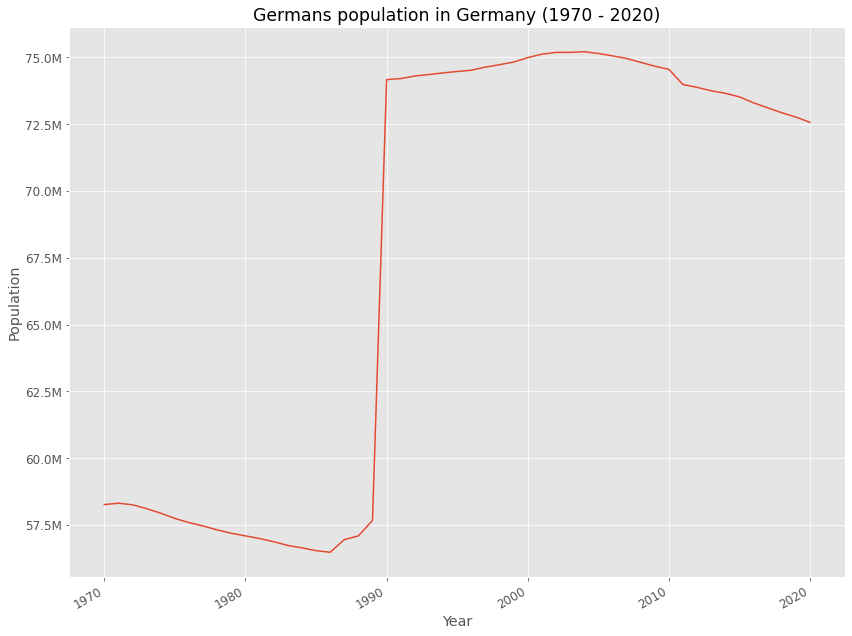

In [12]:
# initialize the matplotlib figure
fig, ax = plt.subplots()
fig.autofmt_xdate()

# plot exports trade
sns.lineplot(x='Year', y='Germans', data=df, ax=ax)
ax.set(title='Germans population in Germany (1970 - 2020)', xlabel='Year', ylabel='Population')

# set y-axis formatter
ax.yaxis.set_major_formatter(format_mill)

Foreigners Population in Germany

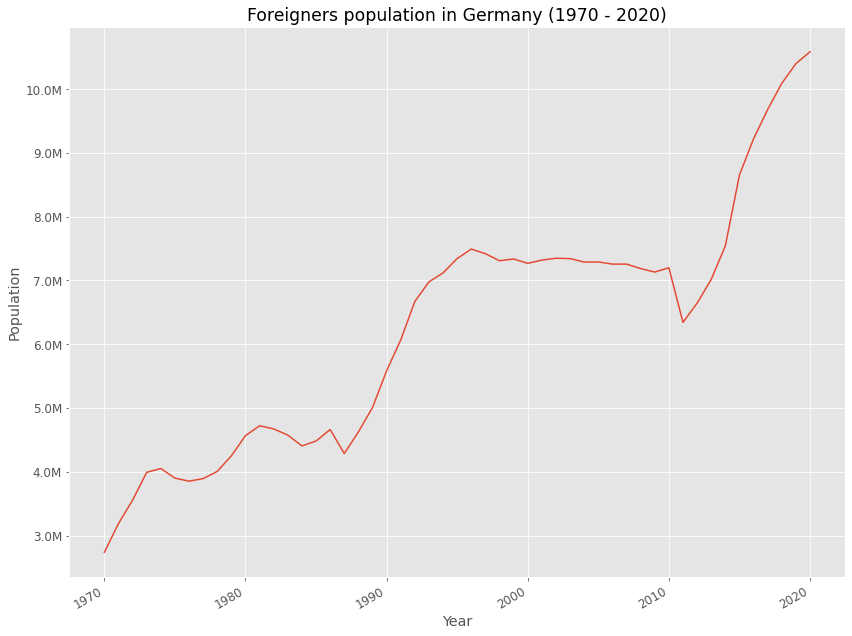

In [13]:
# initialize the matplotlib figure
fig1, ax1 = plt.subplots()
fig1.autofmt_xdate()

# plot exports trade
sns.lineplot(x='Year', y='Foreigners', data=df, ax=ax1)
ax1.set(title='Foreigners population in Germany (1970 - 2020)', xlabel='Year', ylabel='Population')

# set y-axis formatter
ax1.yaxis.set_major_formatter(format_mill)

Population of German's and Foreigners in Germany

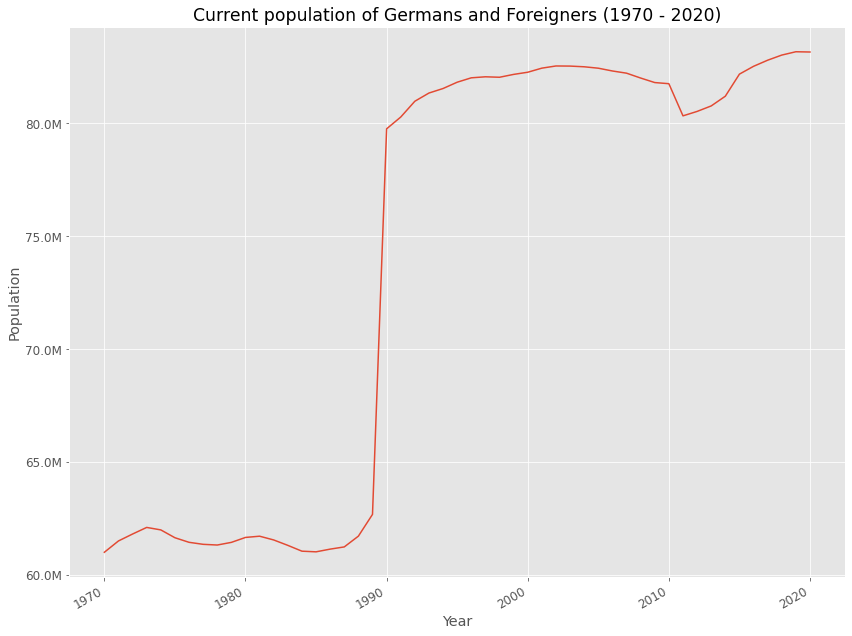

In [14]:
# initialize the matplotlib figure
fig3, ax3 = plt.subplots()
fig3.autofmt_xdate()

# plot exports trade
sns.lineplot(x='Year', y='Total', data=df, ax=ax3)
ax3.set(title='Current population of Germans and Foreigners (1970 - 2020)', xlabel='Year', ylabel='Population')

# set y-axis formatter
ax3.yaxis.set_major_formatter(format_mill)

Population growth by Nationality between 1970 - 2020

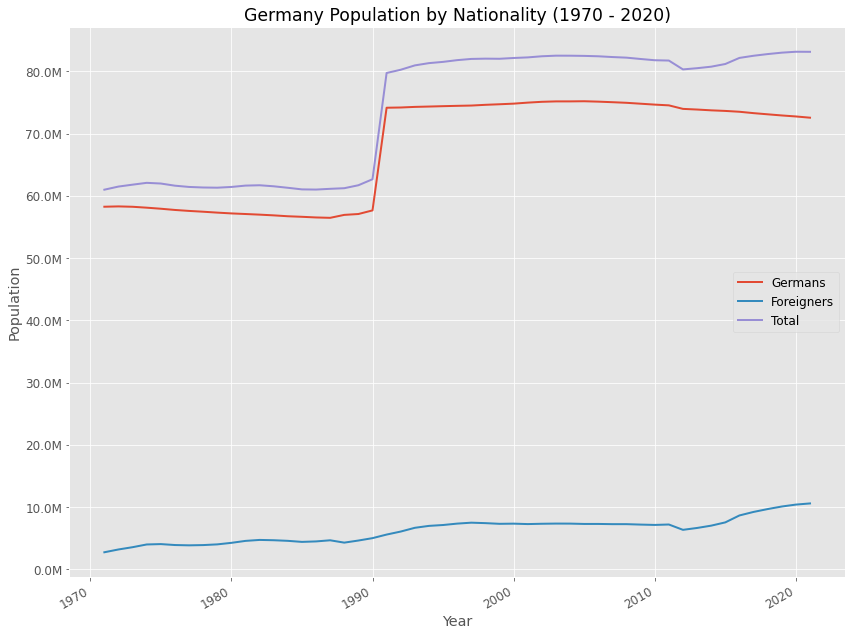

In [15]:
# initialize the matplotlib figure
fig4, ax4 = plt.subplots()
fig4.autofmt_xdate()

# plot line
ax4.plot(df['ReferenceDate'], df['Germans'], label='Germans', linewidth=2)
ax4.plot(df['ReferenceDate'], df['Foreigners'], label='Foreigners', linewidth=2)
ax4.plot(df['ReferenceDate'], df['Total'], label='Total', linewidth=2)

# label plots
ax4.set(title='Germany Population by Nationality (1970 - 2020)', xlabel='Year', ylabel='Population')

# set y-axis formatter
ax4.yaxis.set_major_formatter(format_mill)

# plot legend
ax4.legend(loc=5)

Germans and Foreigners Population by Proportion

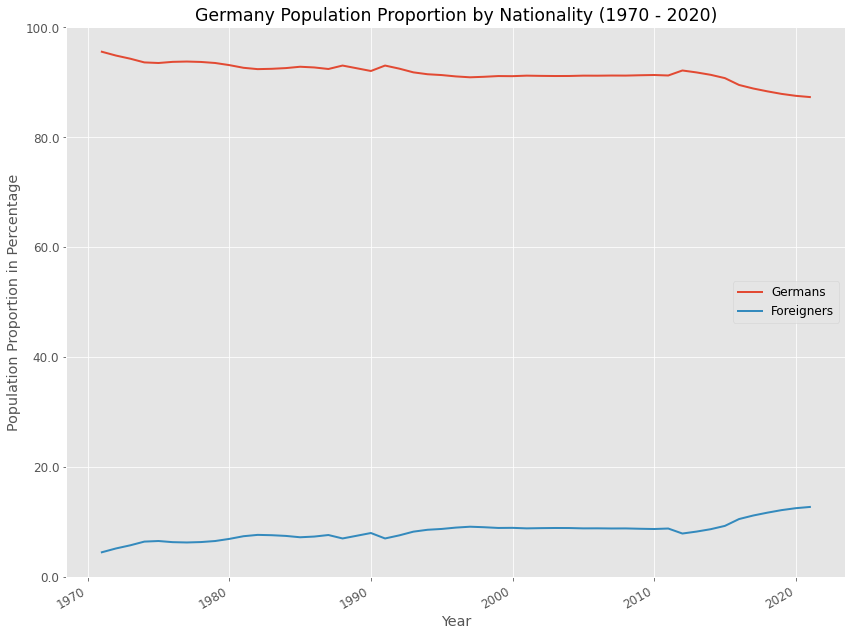

In [16]:
# initialize the matplotlib figure
fig5, ax5 = plt.subplots()
fig5.autofmt_xdate()

# population growth by Nationality between 1970 - 2020
ax5.plot(df['ReferenceDate'], df['GermansPct'], label='Germans', linewidth=2)
ax5.plot(df['ReferenceDate'], df['ForeignersPct'], label='Foreigners', linewidth=2)

# label plot
ax5.set(title='Germany Population Proportion by Nationality (1970 - 2020)', 
        xlabel='Year', ylabel='Population Proportion in Percentage')

# set y-axis formatter
ax5.yaxis.set_major_formatter(format_pct)

# plot legend
ax5.legend(loc=5)